In [3]:
import numpy as np

# 加载数据
black_data = np.load('target_plot1/black_region.npy')  # 黑色区域
red_data = np.load('target_plot1/red_region.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('target_plot1/features.npy', features)  # 保存打乱的特征数组
np.save('target_plot1/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[-0.38623203 -0.18423538]
 [-0.03350289 -0.41388398]
 [ 0.00175161 -0.40372379]
 [-0.83858299 -0.06337427]
 [ 0.30070891  0.34867617]]
前5个标签： [0 0 1 0 0]


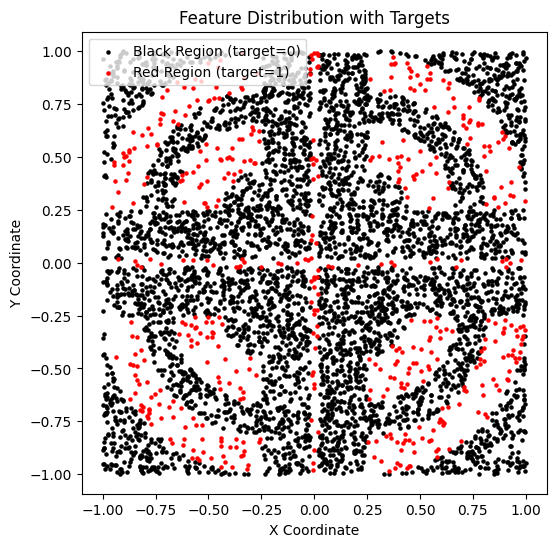

In [4]:

from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('target_plot1/features.npy')
y = np.load('target_plot1/targets.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=5, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=5, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()


In [ ]:
import os
# 配置输出文件夹
output_dir = "target_plot1"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Begin to train.... - 2024-12-09 22:05:39,111 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-09 22:05:39,112 - DualGranularBalancedDeepForest
use f1_macro as training evaluation - 2024-12-09 22:05:39,112 - DualGranularBalancedDeepForest
stacking: True, save model: False - 2024-12-09 22:05:39,113 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-09 22:05:39,113 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-09 22:05:39,114 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_0,Accuracy=0.9127, f1_score=0.8048, auc=0.9713, gmean=0.9205, sen=0.9300, spe=0.9110, aupr=0.7251 - 2024-12-09 22:05:43,925 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_1,Accuracy=0.9400, f1_score=0.8479, auc=0.9839, gmean=0.9171, sen=0.8900, spe=0.9450, aupr=0.8803 - 2024-12-09 22:05:43,929 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_2,Accuracy=0.9309, f1_score=0.8375, auc=0.9834, gmean=0.9394, sen=0.9500, spe=0.9290, aupr=0.8529 - 2024-12-09 22:05:43,936 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_3,Accuracy=0.9400, f1_score=0.8500, auc=0.9684, gmean=0.9264, sen=0.9100, spe=0.9430, aupr=0.7955 - 2024-12-09 22:05:43,941 - KFoldWrapper
layer_0, estimator_0, BalancedEnsembleClassifier, n_fold_4,Accuracy=0.9355, f1_score=0.8457, auc=0.9829, gmean=0.9420, sen=0.9500, spe=0.9340, aupr=0.7979 - 2024-12-09 22:05:43,946 - KFoldWrapper
layer_0, estimator_0

Training BalanceCascade...
BalanceCascade - Accuracy: 0.9960


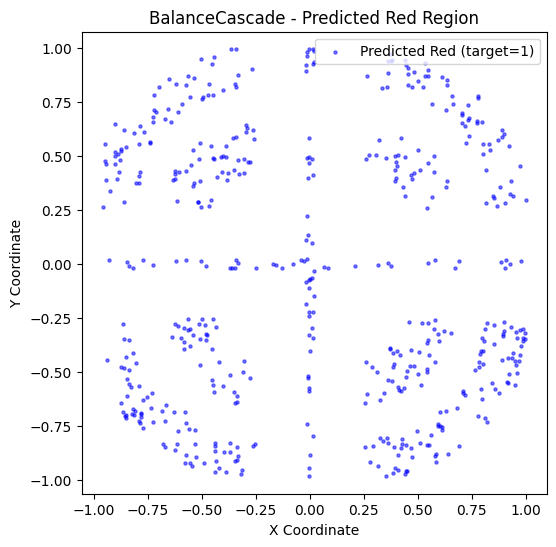

Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 1.0000


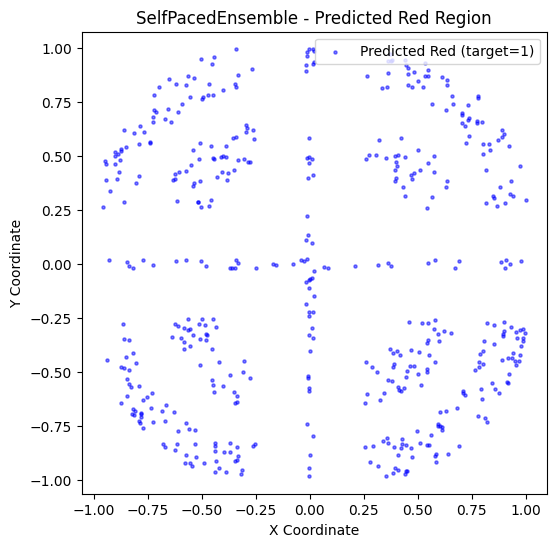

Training UnderBagging...
UnderBagging - Accuracy: 0.9624


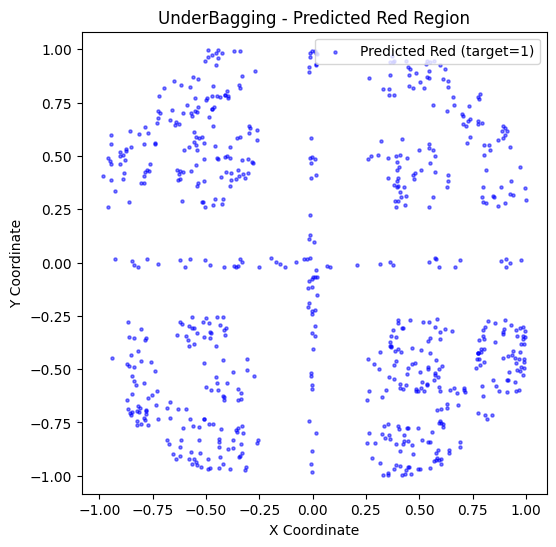

Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.7045


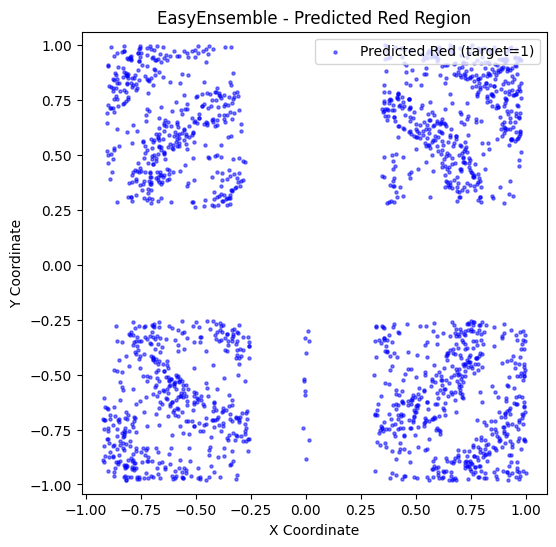

Training RUSBoost...
RUSBoost - Accuracy: 0.5969


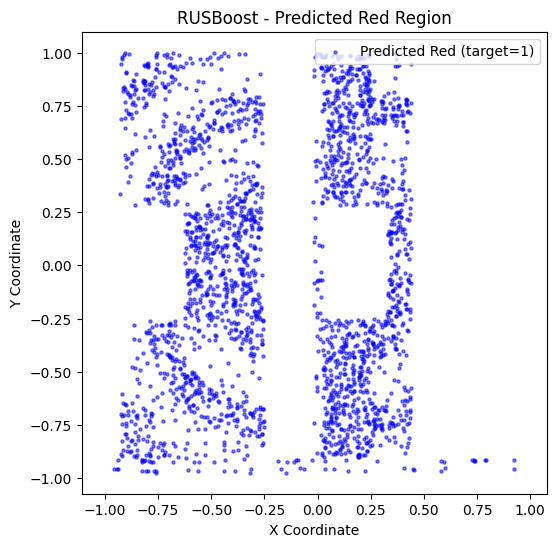

Training BalancedRandomForest...
BalancedRandomForest - Accuracy: 0.9160


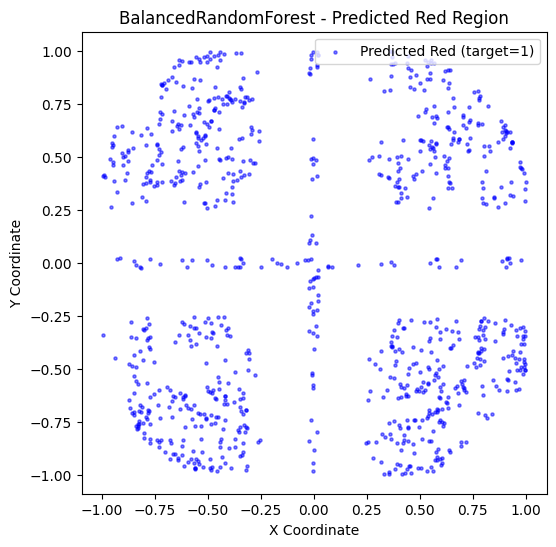

Training AdaCost...
AdaCost - Accuracy: 0.5129


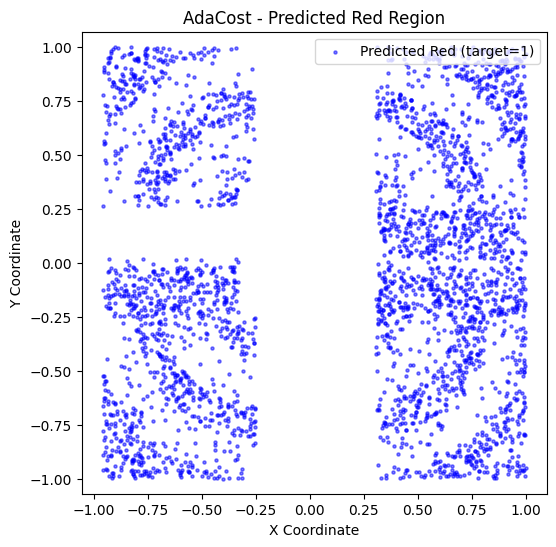

Training AdaUBoost...
AdaUBoost - Accuracy: 0.7158


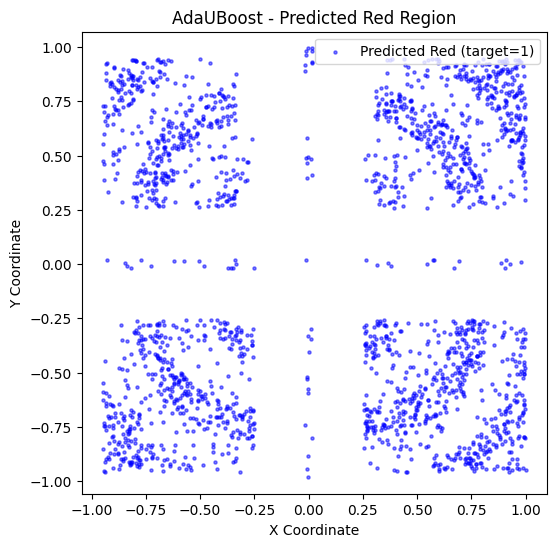

Training AsymBoost...
AsymBoost - Accuracy: 0.9047


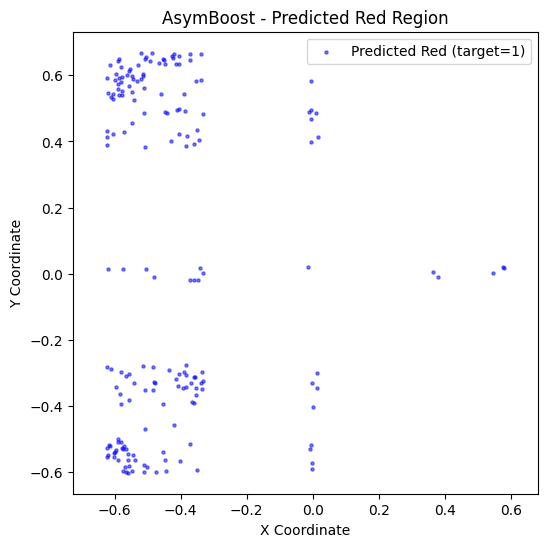

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os

# 配置输出文件夹
output_dir = "target_plot1"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50)
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)

    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9996


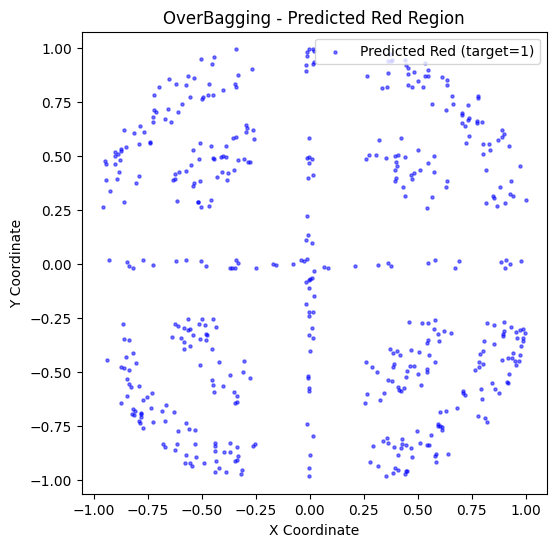

Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.7169


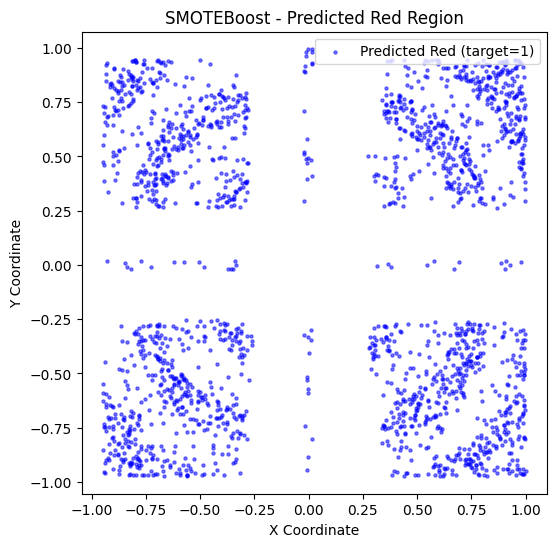

Training OverBoost...
OverBoost - Accuracy: 0.7402


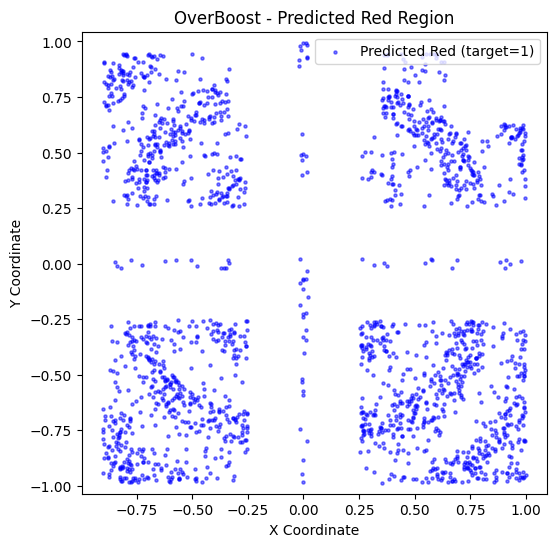

Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7287


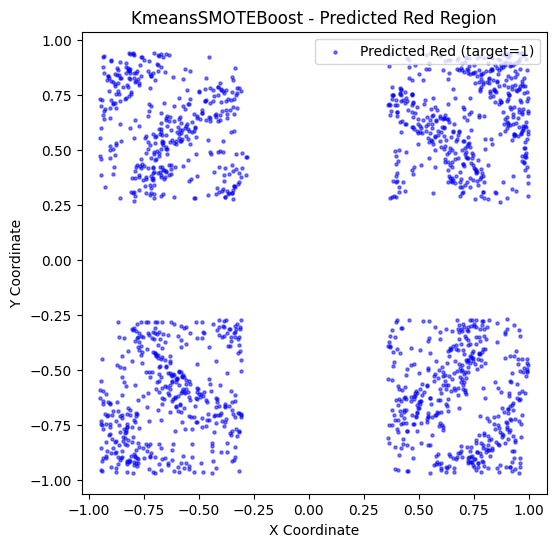

Training SMOTEBagging...
SMOTEBagging - Accuracy: 0.9998


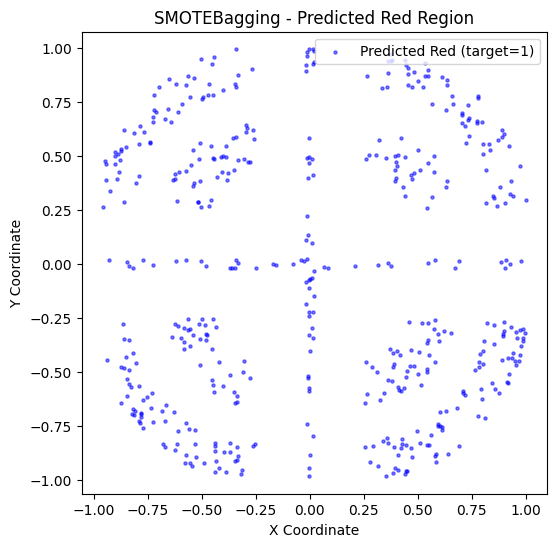

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "target_plot1"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    print(f"{method_name} - Accuracy: {acc:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    
    # 找到预测为红色的点
    predicted_red = X[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X[(y == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
